In [41]:
import pandas as pd
import numpy as py
import matplotlib.pyplot 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [42]:
data=pd.read_csv('/home/sri/jupy/ML/drug2000(1).csv')

In [43]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,F,HIGH,HIGH,25.355,drugY
1,47.0,M,LOW,HIGH,13.093,drugC
2,47.0,M,LOW,HIGH,10.114,drugC
3,28.0,F,NORMAL,HIGH,7.798,drugX
4,61.0,F,LOW,HIGH,18.043,drugY


In [44]:

data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [45]:

len(data.columns)

6

In [46]:
data.describe()

,Age,Na_to_K
count,2000.000000,2000.000000
mean,45.009553,15.898795
std,16.484079,7.216931
min,14.805530,6.210282
25%,31.824812,10.382293
50%,46.030570,13.852140
75%,58.865792,19.218903
max,74.224810,38.461119


In [47]:
data.Age.unique()

array([23.        , 47.        , 28.        , ..., 23.73408239,
       16.21397797, 37.11395119])

In [48]:
data.Sex.unique()

array(['F', 'M'], dtype=object)

In [49]:
data.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [50]:
data.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [51]:
data.Na_to_K.unique()

array([25.355     , 13.093     , 10.114     , ..., 18.55699222,
       12.06495367, 23.11843421])

In [52]:
data.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [80]:
data['Age'] = data['Age'].astype(int)

In [81]:
import numpy as np

def gini_index(groups, classes):
    # Calculate the total number of samples at the split point
    total_samples = sum([len(group) for group in groups])

    # Initialize the Gini Index to 0
    gini = 0.0

    # Calculate the Gini Index for each group
    for group in groups:
        group_size = len(group)
        if group_size == 0:
            continue
        score = 0.0
        # Calculate the score for each class in the group
        for class_val in classes:
            proportion = [row[-1] for row in group].count(class_val) / group_size
            score += proportion ** 2
        # Weight the group score by its relative size
        gini += (1.0 - score) * (group_size / total_samples)

    return gini


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          2000 non-null   int64  
 1   Sex          2000 non-null   int64  
 2   BP           2000 non-null   int64  
 3   Cholesterol  2000 non-null   int64  
 4   Na_to_K      2000 non-null   float64
 5   Drug         2000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 93.9+ KB


In [83]:
len(data.Drug.unique())

5

In [84]:
data.isnull().sum()
#check the null values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [85]:
# encode sex column

In [86]:
# assign numerical values to labels
from sklearn import preprocessing
le_Sex = preprocessing.LabelEncoder()
le_Sex.fit(['F', 'M'])
data['Sex'] = le_Sex.fit_transform(data['Sex'])# transform sex column

In [87]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [88]:
data['Sex'].unique()

array([0, 1])

In [89]:
# encode BP column
le_BP = preprocessing.LabelEncoder()
le_BP.fit(data['BP'].unique())
data['BP'] = le_BP.fit_transform(data['BP'])#transform BP colum

In [90]:
data['BP'].unique()

array([0, 1, 2])

In [91]:
#encode Cholesterol column

In [92]:

le_Cholesterol = preprocessing.LabelEncoder()
le_Cholesterol.fit(data['Cholesterol'].unique())
data['Cholesterol'] = le_Cholesterol.fit_transform(data['Cholesterol'])#transform Cholesterol column

In [93]:
data.sample(30)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
94,56,1,1,0,15.015000,drugY
1327,20,0,1,1,11.573386,drugX
263,69,1,0,0,9.904089,drugB
752,65,0,2,1,8.008122,drugX
1355,55,1,1,0,15.034204,drugY
221,42,1,0,0,13.973733,drugA
1480,48,1,1,1,11.042285,drugX
572,49,0,2,1,12.374288,drugX
722,38,0,1,1,29.844811,drugY
1878,49,0,2,1,9.516444,drugX


In [94]:
data['Cholesterol'].unique()

array([0, 1])

In [95]:
#seperate independent and dependent variables
x=data.drop('Drug',axis=1)
y=data['Drug']

In [96]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355000
1,47,1,1,0,13.093000
2,47,1,1,0,10.114000
3,28,0,2,0,7.798000
4,61,0,1,0,18.043000
...,...,...,...,...,...
1995,42,1,0,1,12.730999
1996,31,1,0,1,17.140273
1997,23,0,0,1,18.556992
1998,16,1,1,0,12.064954


In [97]:
y.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

**Decision** **Tree**

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      Age  Sex  BP  Cholesterol    Na_to_K
81     64    1   2            0   7.761000
915    71    1   1            0  16.383087
1018   58    0   1            0  10.461753
380    66    0   2            0  15.926990
1029   59    0   1            0  10.428897
...   ...  ...  ..          ...        ...
1130   59    0   1            0  10.357350
1294   50    1   0            1  11.496991
860    33    0   1            0  33.634787
1459   41    1   0            1  15.280722
1126   33    1   0            0  18.755178

[1340 rows x 5 columns]
      Age  Sex  BP  Cholesterol    Na_to_K
1860   45    1   1            0  18.030194
353    46    0   2            1   6.729615
1333   18    0   2            1   8.525001
905    73    1   1            1  11.974792
1289   37    1   1            0  18.399736
...   ...  ...  ..          ...        ...
118    32    0   0            1  10.292000
1249   50    0   1            1  23.049637
1993   50    1   2            1  15.669262
522    31    0   1           

In [99]:
from sklearn.tree import DecisionTreeClassifier
Drug_classifier=DecisionTreeClassifier(criterion='entropy',max_depth=20)
#train
Drug_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [100]:
from sklearn import tree
import matplotlib.pyplot as plt

In [101]:

y_pred=Drug_classifier.predict(x_test)

**Evaluate**

In [102]:

from sklearn import metrics
import matplotlib.pyplot as plt
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [103]:
import sklearn
print(sklearn.__version__)


1.3.0


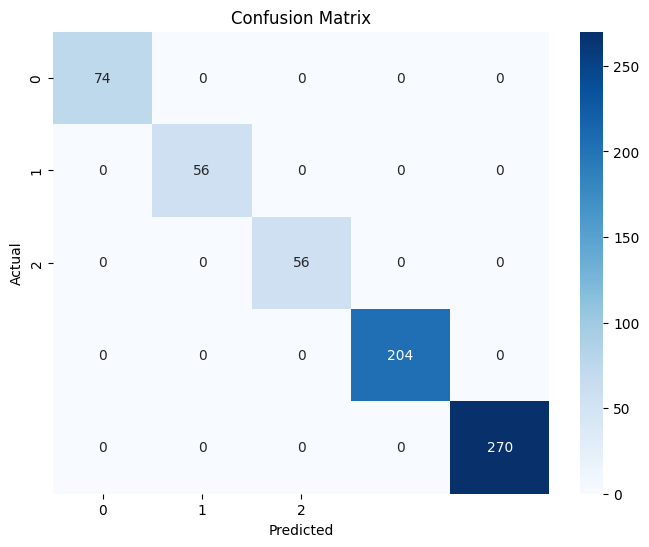

In [104]:
from sklearn.metrics import confusion_matrix
# Use the correct variable name that matches your model
y_pred = Drug_classifier.predict(x_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1,2], yticklabels=[0, 1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


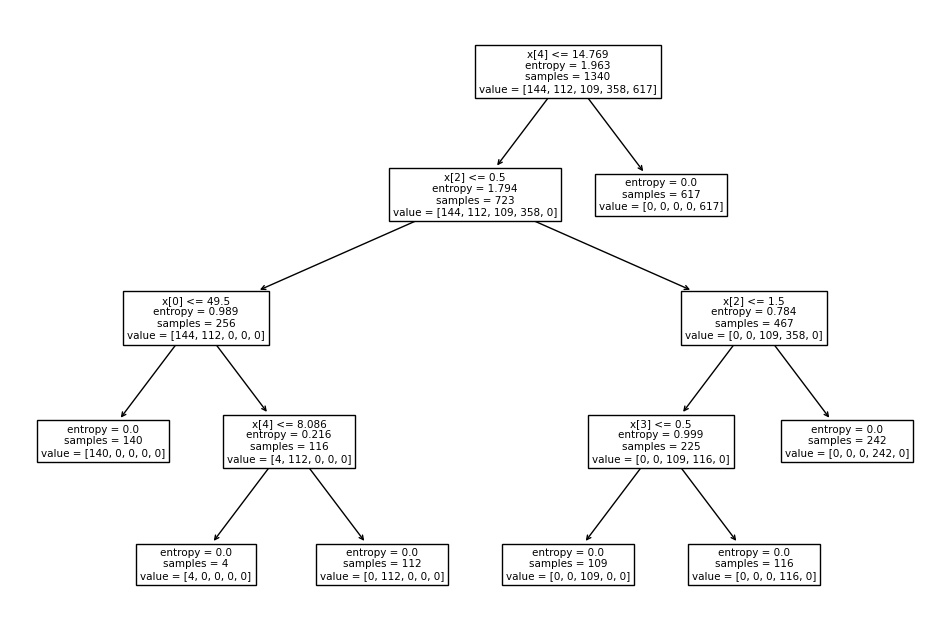

In [105]:

plt.figure(figsize=(12,8))
tree.plot_tree(Drug_classifier.fit(x_train, y_train))
plt.show()


In [106]:
from sklearn.preprocessing import LabelEncoder

X = np.array(['28','Female','NORMAL','HIGH', '13'])
label = LabelEncoder()
X = label.fit_transform(X)
y_pred = Drug_classifier.predict(X.reshape(1,-1))
y_pred


array(['drugX'], dtype=object)

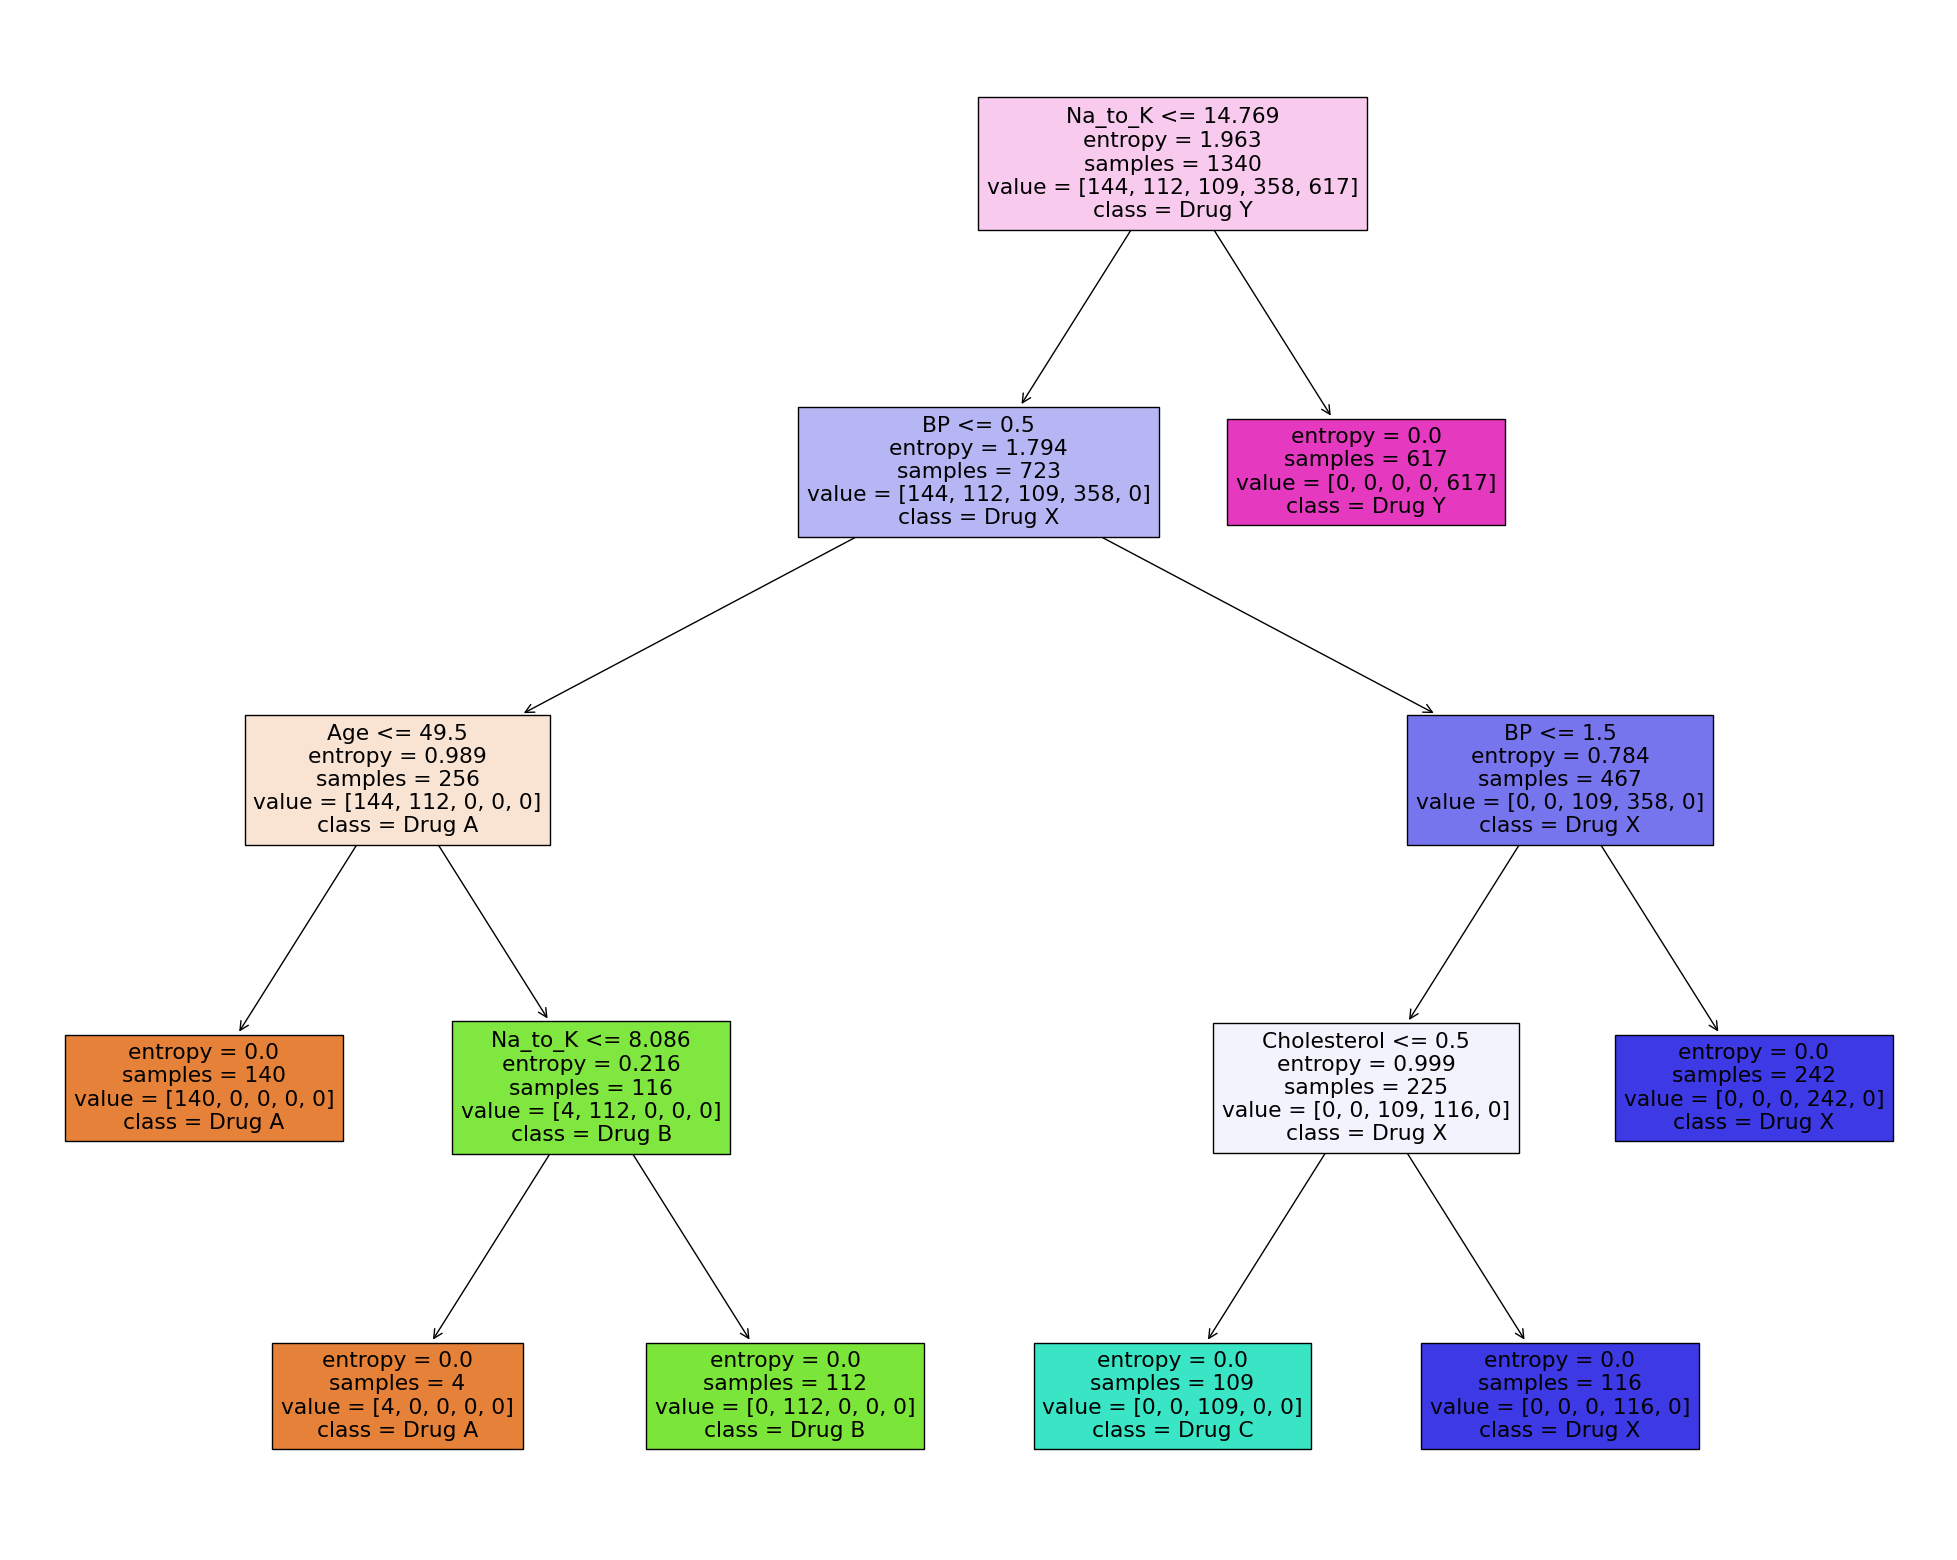

In [107]:
from sklearn import tree

feature_names = list(data.columns[:-1])  
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(Drug_classifier, 
                   feature_names=feature_names, 
                   class_names=['Drug A', 'Drug B', 'Drug C', 'Drug X', 'Drug Y'],
                   filled=True)

plt.show()


In [108]:
text_representation = tree.export_text(Drug_classifier)
print(text_representation)

|--- feature_4 <= 14.77
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 49.50
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  49.50
|   |   |   |--- feature_4 <= 8.09
|   |   |   |   |--- class: drugA
|   |   |   |--- feature_4 >  8.09
|   |   |   |   |--- class: drugB
|   |--- feature_2 >  0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: drugC
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: drugX
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: drugX
|--- feature_4 >  14.77
|   |--- class: drugY

